## Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns' ,27)
pd.options.display.max_columns =100

In [2]:
df = pd.read_csv(r"D:\AnacondaProjects\EmployeePerformance\data\processed\train.csv")
df_test = pd.read_csv(r"D:\AnacondaProjects\EmployeePerformance\data\processed\test.csv")

print(df.shape)
df.head(2)
df_test.head()

(1200, 27)


Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            20                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                        7                     6        No                  3  
4                        2                     2        No                  3

### Since 'EmpDepartment' and 'EmpJobRole' features carry same information we are dropping one of it i.e 'EmpJobRole

In [3]:
df.drop("EmpJobRole" ,axis=1,inplace=True )

## Listing columns into Continous n Categorical

* Catcol_list_toEncode : Categorical data need to be encoded
* Catcol_list  : list of all categorical data 
* Concol_list  : list of all continous data

In [4]:
#Check for null values
df.isnull().sum()

#Listing categorical n continous columns
Catcol_list_toEncode = ['Gender' ,'EducationBackground' ,'MaritalStatus','EmpDepartment',
                        'BusinessTravelFrequency','OverTime' ,'Attrition' ]
Catcol_list = ['Gender' ,'EducationBackground' ,'MaritalStatus','EmpDepartment',
               'BusinessTravelFrequency','OverTime' ,'Attrition','EmpEducationLevel' ,'EmpEnvironmentSatisfaction' ,
               'EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked',
               'EmpRelationshipSatisfaction','TrainingTimesLastYear' ,'EmpWorkLifeBalance' ,'PerformanceRating']
Concol_list = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent',
       'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']


## Correlation Matrix

###### Observations
* Col TotalWorkExperienceInYears and EmpJobLevel are highly correlated
* Col ExperienceYearsInCurrentRole and ExperienceYearsAtThisCompany are highly correlated
* Col YearsWithCurrManager exibits strong correlation with ExperienceYearsInCurrentRole and ExperienceYearsAtThisCompany

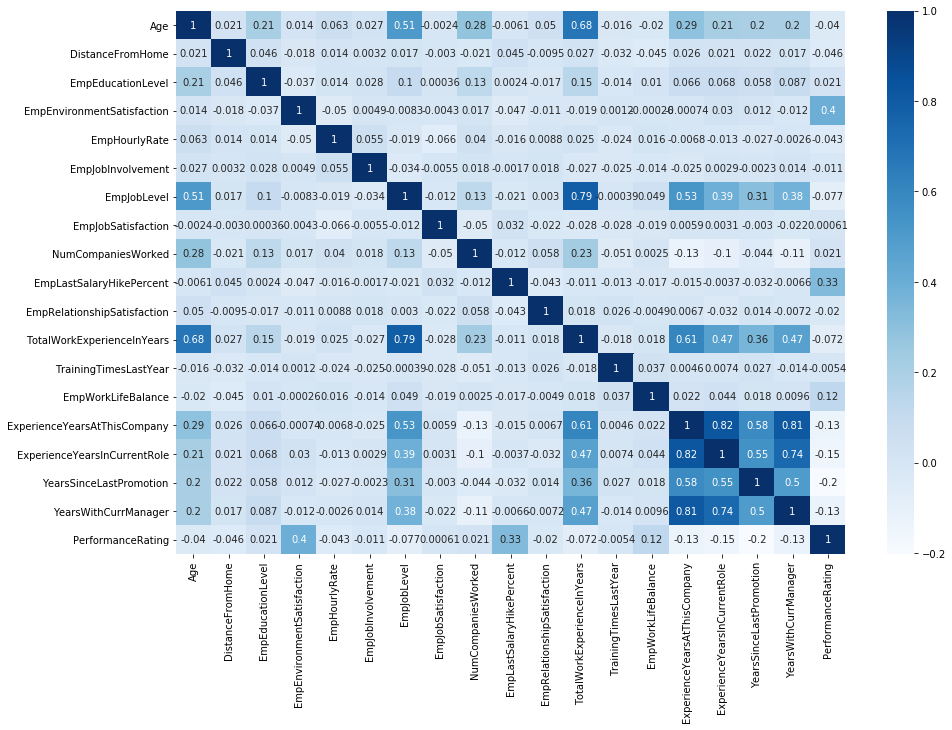

In [36]:

cormat = df.corr()
rcParams['figure.figsize']= 15,10
sns.heatmap(cormat,cmap="Blues" , annot=True)

### Drop highly correlated columns 

In [5]:
del_col =['TotalWorkExperienceInYears' ,'ExperienceYearsInCurrentRole','YearsWithCurrManager','ExperienceYearsAtThisCompany']
df = df.loc[: , ~df.columns.isin(del_col)]
df_test = df_test.loc[: , ~df_test.columns.isin(del_col)]
df.head(2)

Age Gender EducationBackground MaritalStatus EmpDepartment  \
0   32   Male           Marketing        Single         Sales   
1   47   Male           Marketing        Single         Sales   

  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0           Travel_Rarely                10                  3   
1           Travel_Rarely                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                   4                   1       No                        12   
1                   1                   2       No                        12   

   EmpRelationshipSatisfaction  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                            4                      2                   2   
1                            4                      2                   3   

   YearsSinceLastPromotion Attrition  PerformanceRating  
0                        0        No                  3  
1                        1        No                  3

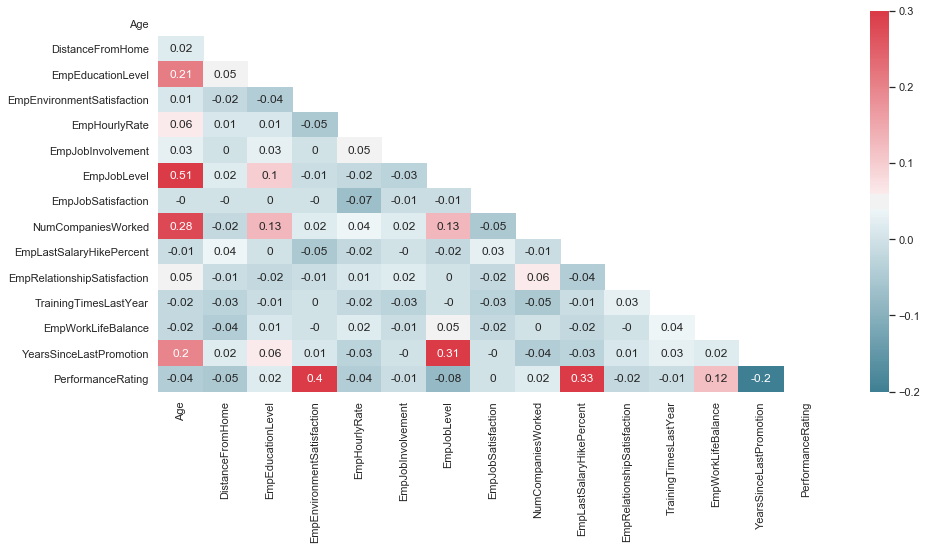

In [38]:
corr_list = df.corr(method='pearson').round(2)  #spearman
sns.set(style='white')
mask = np.zeros_like(corr_list,dtype=np.bool)
mask[np.triu_indices_from(mask)] =True

rcParams['figure.figsize'] =15,7
sns.heatmap(corr_list ,annot=True,mask=mask,cmap=sns.diverging_palette(220,10,as_cmap=True),vmax=0.3)

In [6]:
X = df.loc[:,df.columns != 'PerformanceRating']
y = df['PerformanceRating']


## Multicollinearity using Variable Inflation Factors  
* COlumsn :'Age','EmpJobInvolvement' ,'EmpLastSalaryHikePercent','EmpWorkLifeBalance' shows Multicollinearity having VIF >10
* But dropping all above columns negatively affecting the accuracy hence dropping only 'Age' column

In [9]:
df.dtypes

Age                             int64
Gender                         object
EducationBackground            object
MaritalStatus                  object
EmpDepartment                  object
EmpJobRole                     object
BusinessTravelFrequency        object
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                       object
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TrainingTimesLastYear           int64
EmpWorkLifeBalance              int64
YearsSinceLastPromotion         int64
Attrition                      object
PerformanceRating               int64
dtype: object

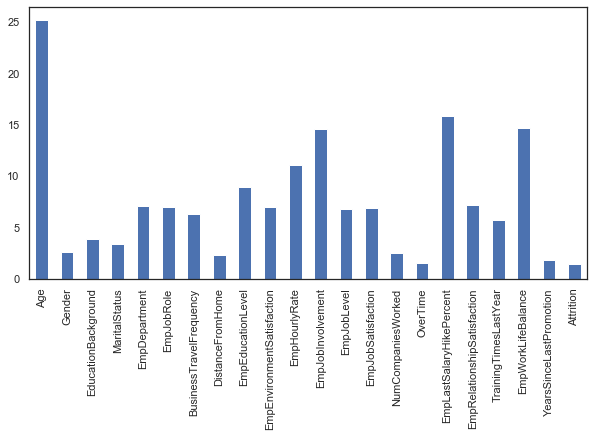

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_num = X._get_numeric_data()
vif = pd.DataFrame()
vif = pd.Series([variance_inflation_factor(X_num.values, i) 
               for i in range(X_num.shape[1])], 
              index=X_num.columns)
vif.plot(kind='bar')

In [7]:
# Drop the columns which shows Multicollinearity i.e VIF >10
del_col =['Age']
df = df.loc[: , ~df.columns.isin(del_col)]
df_test =  df_test.loc[: , ~df_test.columns.isin(del_col)]
df.head(2)

Gender EducationBackground MaritalStatus EmpDepartment  \
0   Male           Marketing        Single         Sales   
1   Male           Marketing        Single         Sales   

  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0           Travel_Rarely                10                  3   
1           Travel_Rarely                14                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                   4                   1       No                        12   
1                   1                   2       No                        12   

   EmpRelationshipSatisfaction  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                            4                      2                   2   
1                            4                      2                   3   

   YearsSinceLastPromotion Attrition  PerformanceRating  
0                        0        No                  3  
1                        1        No                  3

## Label Encoding : 
* Encoding categorical data

In [8]:
df[Catcol_list].head()

for i in Catcol_list_toEncode:
    val=df[i].value_counts().count()
    print("{}  : {}".format(i,val))
    print("="*40)

Gender  : 2
EducationBackground  : 6
MaritalStatus  : 3
EmpDepartment  : 6
BusinessTravelFrequency  : 3
OverTime  : 2
Attrition  : 2


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder =LabelEncoder()
for i in Catcol_list_toEncode :
    df[i] = encoder.fit_transform(df[i])
    df_test[i] = encoder.fit_transform(df_test[i])
    
df[Catcol_list_toEncode].head(2)
df['PerformanceRating'] = encoder.fit_transform(df['PerformanceRating'])
df_test['PerformanceRating'] = encoder.fit_transform(df_test['PerformanceRating'])

## Train Test Split

In [10]:
X= df.loc[:,df.columns != 'PerformanceRating']
y= df['PerformanceRating']


## PCA

* Top 9 significant features selected from PCA technique are :

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement']

##### Standardising the data before applying PCA

In [11]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
X_std = pca.fit_transform(X)

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca =pca.fit_transform(X_std)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.53836987 1.3205551  1.24722505 1.19138562 1.16475174 1.08915308
 1.06544478 1.04105228 1.01696346 0.97622386 0.97287372 0.95728754
 0.91334711 0.90007629 0.89489499 0.87174601 0.84853517 0.8122055
 0.67634746 0.51824193]
[0.07685439 0.06597273 0.06230928 0.05951964 0.05818906 0.05441227
 0.05322785 0.05200924 0.0508058  0.04877052 0.04860315 0.04782449
 0.0456293  0.04496631 0.04470746 0.04355098 0.0423914  0.04057643
 0.03378919 0.0258905 ]


In [13]:
li =pd.DataFrame(data=pca.explained_variance_ratio_ )
li=li*100
li[1] = df.iloc[:,0:-1].columns
li.columns = ['pca_values' ,'Col_names']
li

pca_values                    Col_names
0     7.685439                       Gender
1     6.597273          EducationBackground
2     6.230928                MaritalStatus
3     5.951964                EmpDepartment
4     5.818906      BusinessTravelFrequency
5     5.441227             DistanceFromHome
6     5.322785            EmpEducationLevel
7     5.200924   EmpEnvironmentSatisfaction
8     5.080580                EmpHourlyRate
9     4.877052            EmpJobInvolvement
10    4.860315                  EmpJobLevel
11    4.782449           EmpJobSatisfaction
12    4.562930           NumCompaniesWorked
13    4.496631                     OverTime
14    4.470746     EmpLastSalaryHikePercent
15    4.355098  EmpRelationshipSatisfaction
16    4.239140        TrainingTimesLastYear
17    4.057643           EmpWorkLifeBalance
18    3.378919      YearsSinceLastPromotion
19    2.589050                    Attrition

In [14]:
df_skb =li.sort_values(by='pca_values',ascending=False)
X_pcb=list(df_skb.iloc[0:11,1])
X_pcb

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'BusinessTravelFrequency',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel']

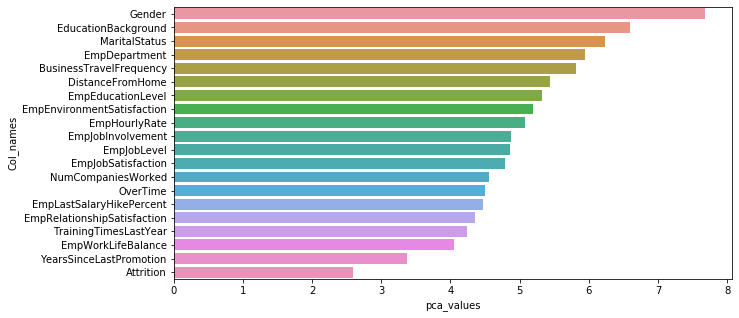

In [15]:
rcParams['figure.figsize']=10,5
groupedvalues=li.groupby('pca_values').sum().reset_index()
groupedvalues=groupedvalues.sort_values('pca_values').reset_index()

ax = sns.barplot(x =li['pca_values'] ,y=li['Col_names'],data=groupedvalues)



## Feature Selection by : SelectKBest

* The top 8 significant fetaures selected by SelectKBest technique are:

['EmpLastSalaryHikePercent',
 'YearsSinceLastPromotion',
 'EmpEnvironmentSatisfaction',
 'EmpDepartment',
 'EmpJobRole',
 'DistanceFromHome',
 'OverTime',
 'EmpWorkLifeBalance']

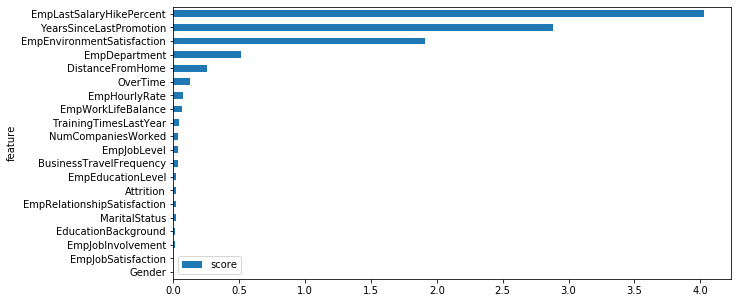

In [16]:
from sklearn.feature_selection import SelectKBest ,chi2
from sklearn import preprocessing

X_norm = pd.DataFrame(preprocessing.normalize(X))

selectK = SelectKBest(score_func = chi2 , k=8)
selectK.fit(X_norm,y)

df_skb = pd.DataFrame({'feature' : X.columns , 'score' :selectK.scores_ })
df_skb.sort_values(by='score',ascending=True).plot(kind='barh',x='feature',y='score')


In [17]:
# From the above graph we are select best 8 features for modelling

df_skb =df_skb.sort_values(by='score',ascending=False)
X_skb=list(df_skb.iloc[0:10,0])
X_skb

['EmpLastSalaryHikePercent',
 'YearsSinceLastPromotion',
 'EmpEnvironmentSatisfaction',
 'EmpDepartment',
 'DistanceFromHome',
 'OverTime',
 'EmpHourlyRate',
 'EmpWorkLifeBalance',
 'TrainingTimesLastYear',
 'NumCompaniesWorked']

In [30]:
df1 =df[X_skb]
df1['PerformanceRating'] =df['PerformanceRating']

df2 = df_test[X_skb]
df2['PerformanceRating']=df['PerformanceRating']
df2

EmpLastSalaryHikePercent  YearsSinceLastPromotion  \
0                           12                        0   
1                           12                        1   
2                           21                        1   
3                           15                        7   
4                           14                        2   
...                        ...                      ...   
1195                        20                        0   
1196                        17                        0   
1197                        11                        3   
1198                        14                        7   
1199                        14                        2   

      EmpEnvironmentSatisfaction  EmpDepartment  DistanceFromHome  OverTime  \
0                              4              5                10         0   
1                              4              5                14         0   
2                              4              5                 5         1   
3                              2              3                10         0   
4                              1              5                16         0   
...                          ...            ...               ...       ...   
1195                           4              5                 3         1   
1196                           4              1                10         0   
1197                           4              1                28         1   
1198                           4              0                 9         0   
1199                           1              5                 3         0   

      EmpHourlyRate  EmpWorkLifeBalance  TrainingTimesLastYear  \
0                55                   2                      2   
1                42                   3                      2   
2                48                   3                      2   
3                73                   2                      2   
4                84                   3                      1   
...             ...                 ...                    ...   
1195             71                   3                      3   
1196             80                   3                      2   
1197             74                   3                      3   
1198             46                   4                      3   
1199             65                   3                      3   

      NumCompaniesWorked  PerformanceRating  
0                      1                  1  
1                      2                  1  
2                      5                  2  
3                      3                  1  
4                      8                  1  
...                  ...                ...  
1195                   1                  2  
1196                   3                  1  
1197                   1                  1  
1198                   1                  1  
1199                   9                  0  

[1200 rows x 11 columns]

In [31]:
df1.to_csv(r'D:\AnacondaProjects\EmployeePerformance\data\processed\train_encoded.csv',index=False)
df2.to_csv(r'D:\AnacondaProjects\EmployeePerformance\data\processed\test_encoded.csv',index=False)

In [32]:
print(df_test.shape)
print(df.shape)


(1200, 22)
(1200, 21)


In [34]:
df2.head(2)

EmpLastSalaryHikePercent  YearsSinceLastPromotion  \
0                        12                        0   
1                        12                        1   

   EmpEnvironmentSatisfaction  EmpDepartment  DistanceFromHome  OverTime  \
0                           4              5                10         0   
1                           4              5                14         0   

   EmpHourlyRate  EmpWorkLifeBalance  TrainingTimesLastYear  \
0             55                   2                      2   
1             42                   3                      2   

   NumCompaniesWorked  PerformanceRating  
0                   1                  1  
1                   2                  1